# 딥러닝분석_(3)CNN-숫자이미지분류

# 1. 데이터 수집

In [1]:
from keras.datasets import mnist

In [2]:
(X_train_0, Y_train_0), (X_test_0, Y_test_0) = mnist.load_data()

# 2. 데이터 준비 및 탐색

## 1) 데이터 확인하기

In [3]:
print("학습 데이터 수 : %d"%(X_train_0.shape[0]))
print("평가 데이터 수 : %d"%(X_test_0.shape[0]))

학습 데이터 수 : 60000
평가 데이터 수 : 10000


### - 입력 학습 데이터 :  X_train[0] 이미지 출력

In [4]:
import matplotlib.pyplot as plt

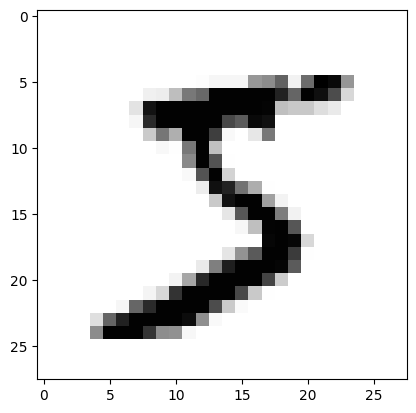

In [5]:
plt.imshow(X_train_0[0], cmap='Greys')
plt.show()

### - 출력 학습 데이터(레이블) : Y_train

In [6]:
print("class : %d " % (Y_train_0[0]))

class : 5 


### - 입력 학습 데이터 : X_train[0] 벡터 출력

In [7]:
import sys

In [8]:
for x in X_train_0[0]:
    for i in x:
        sys.stdout.write('%4d' % i)
    sys.stdout.write('\n')

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

## 2) 데이터 정규화 :  {0 ~ 255} -> {0.0 ~ 1.0}

In [9]:
from tensorflow.python.keras.utils import np_utils

In [10]:
X_train = X_train_0.reshape(X_train_0.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test_0.reshape(X_test_0.shape[0], 28, 28, 1).astype('float32') / 255

## 3) 출력값을 0~9 카테고리 벡터로 변형

In [11]:
Y_train = np_utils.to_categorical(Y_train_0, 10)
Y_test = np_utils.to_categorical(Y_test_0, 10)

print(Y_train[0])  #작업 확인용 출력

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 3. 분석 모델 구축 : CNN 모델

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import os  #모델을 저장할 디렉토리 확인 및 만들기

In [13]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 최적화 모델 저장

In [15]:
# 모델 최적화 설정
MODEL_DIR = './14장_data/model/'
if not os.path.exists(MODEL_DIR): 
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [16]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), \
                    epochs=30, batch_size=200, verbose=0, \
                    callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.05548, saving model to ./model\01-0.0555.hdf5


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.05548 to 0.04112, saving model to ./model\02-0.0411.hdf5

Epoch 3: val_loss improved from 0.04112 to 0.03409, saving model to ./model\03-0.0341.hdf5

Epoch 4: val_loss did not improve from 0.03409

Epoch 5: val_loss improved from 0.03409 to 0.02784, saving model to ./model\05-0.0278.hdf5

Epoch 6: val_loss did not improve from 0.02784

Epoch 7: val_loss improved from 0.02784 to 0.02736, saving model to ./model\07-0.0274.hdf5

Epoch 8: val_loss did not improve from 0.02736

Epoch 9: val_loss did not improve from 0.02736

Epoch 10: val_loss improved from 0.02736 to 0.02626, saving model to ./model\10-0.0263.hdf5

Epoch 11: val_loss did not improve from 0.02626

Epoch 12: val_loss did not improve from 0.02626

Epoch 13: val_loss did not improve from 0.02626

Epoch 14: val_loss did not improve from 0.02626

Epoch 15: val_loss did not improve from 0.02626


# 4. 모델 평가 및 시각화

## 1) 모델 정확도 

In [17]:
# 모델 평가 (정확도) 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0337 - accuracy: 0.9916

 Test Accuracy: 0.9916


## 2) 모델 평가 결과 시각화 : loss

In [18]:
import numpy as np

In [19]:
# 평가 데이터셋의 오차
y_vloss = history.history['val_loss']

# 학습 데이터셋의 오차
y_loss = history.history['loss']

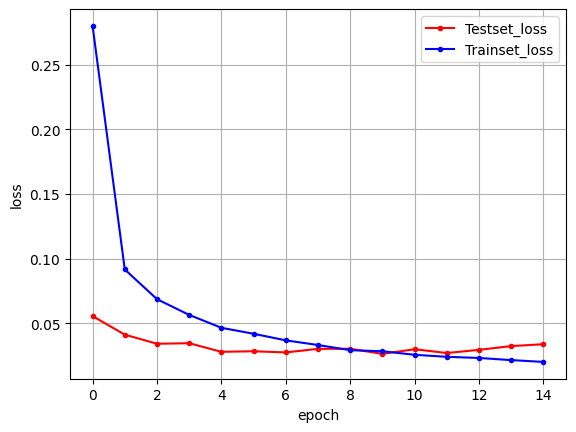

In [20]:
# 오차 그래프
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 5.  숫자 분류 

## 1) X_train[0]을 CNN 분류모델에 입력하여 분류 클래스 확인하기

In [21]:
test_num = X_train[0].reshape(-1, 28, 28, 1)

In [22]:
prediction = model.predict(test_num)

1/1 [==============================] - 0s 52ms/step


In [23]:
prediction #작업 확인용 출력

array([[3.0925643e-15, 2.5340040e-12, 4.8016524e-17, 1.1255580e-03,
        9.6713668e-19, 9.9887437e-01, 1.5834815e-12, 3.4815797e-13,
        4.3502550e-12, 1.5789690e-09]], dtype=float32)

In [24]:
print('입력한 이미지는 %f 확률로 %d 입니다!'%(prediction[0, prediction.argmax()], prediction.argmax()))

입력한 이미지는 0.998874 확률로 5 입니다!


## 2) 새로운 숫자 이미지 파일을 모델에 입력하여 분류 클래스 확인하기

In [25]:
from PIL import Image

In [26]:
test = Image.open('./14장_data/test7.jpg')
test.mode

'RGB'

In [27]:
# 흑백 이미지으로 변환하기
test_gray = test.convert("L") 
test_gray.mode #작업 확인용 출력

'L'

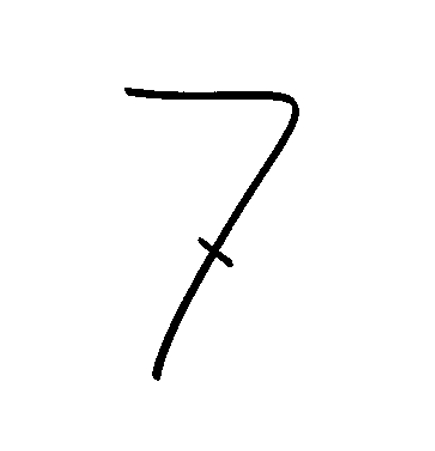

In [28]:
test_gray # 확인용 이미지 출력

In [29]:
test_gray = test_gray.resize((28,28)) #분석 모델의 입력층 사이즈로 변환

In [30]:
test_data = np.asarray(test_gray)

# 이미지 벡터 출력
for x in test_data:
    for i in x:
        sys.stdout.write('%4d' % i)
    sys.stdout.write('\n')

 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 249 160 158 170 176 186 183 169 168 168 174 212 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 231 212 200 195 198 197 194 194 194 189 141 208 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 166 201 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 231 129 251 255 255 255 255

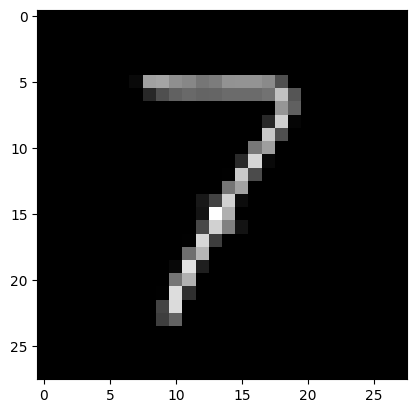

In [31]:
plt.imshow(test_data, cmap='Greys')
plt.show()

In [32]:
#벡터값 반전 시키기
test_data_v = []

for i in range(28):
    row = []
    for j in range(28):                
        row.append(255 - test_data[i][j])
    test_data_v.append(row)     

In [33]:
# 이미지 벡터 출력-2
for x in test_data_v:
    for i in x:
        sys.stdout.write('%4d' % i)
    sys.stdout.write('\n')

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   6  95  97  85  79  69  72  86  87  87  81  43   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  24  43  55  60  57  58  61  61  61  66 114  47   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  89  54   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  24 126   4   0   0   0   0

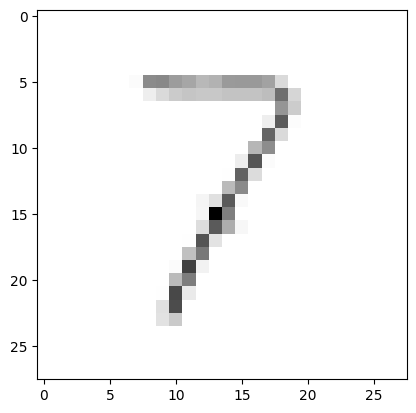

In [34]:
plt.imshow(test_data_v, cmap='Greys')
plt.show()

### - 이미지를 분석 모델의 입력층 형태에 맞게 변환하기

In [35]:
test_data_v2 = np.asarray(test_data_v)
test_data_v2 = test_data_v2.reshape(-1, 28, 28, 1).astype('float32') / 255

test_data_v2.shape  #작업 확인용 출력 : (샘플개수, 가로픽셀수, 세로픽셀수, 색상수)

(1, 28, 28, 1)

### - 모델 실행 및 결과 확인

In [36]:
prediction_new = model.predict(test_data_v2)

prediction_new #작업 확인용 출력

1/1 [==============================] - 0s 12ms/step


array([[9.3095237e-05, 9.2178695e-02, 1.8149702e-01, 1.6400229e-02,
        1.6121351e-04, 8.3897692e-05, 7.1894838e-06, 7.0660001e-01,
        6.5871998e-04, 2.3200382e-03]], dtype=float32)

In [37]:
test_class = prediction_new.argmax()

print('입력한 이미지는 %f 확률로 %d 입니다!'%(prediction_new[0, test_class]*100, test_class))

입력한 이미지는 70.660001 확률로 7 입니다!
